#Author : Mohamed Hesham Zidan©

In [ ]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

###Helper Functions

In [ ]:
def find_intersection(line1, line2):
  """
  This function finds the intersection point of two lines represented by (rho, theta) format.

  Args:
      line1: A list containing (rho, theta) for the first line.
      line2: A list containing (rho, theta) for the second line.

  Returns:
      A tuple containing the x and y coordinates of the intersection point,
      or None if the lines are parallel.
  """
  rho1, theta1 = line1[0]
  rho2, theta2 = line2[0]

  # Check for parallel lines (avoid division by zero)
  if np.abs(np.sin(theta1 - theta2)) < 1e-6:
    return None

  a1, b1 = np.cos(theta1), np.sin(theta1)
  a2, b2 = np.cos(theta2), np.sin(theta2)

  # Calculate the intersection point coordinates
  x = int((rho2 * b1 - rho1 * b2) / (a2 * b1 - a1 * b2))
  y = int((rho1 * a2 - rho2 * a1) / (a2 * b1 - a1 * b2))

  return (x, y)

In [ ]:
def visualize_intersections(image, lines):
  """
  This function iterates through pairs of lines, finds their intersection,
  and draws a red circle at the intersection point on the image.

  Args:
      image: The image where lines were detected.
      lines: A list of lines, where each line is a list containing (rho, theta).
  """
  image_copy = copy.copy(image)
  intersections=[]
  for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
      intersection = find_intersection(lines[i], lines[j])
      if intersection:

        x, y = intersection
        intersections.append([x,y])
        cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1)

  plt.imshow(image_copy, cmap="gray")
  plt.title('hough points of intersection')
  plt.show()
  return intersections

In [ ]:
def draw_lines(image,lines):
  image_copy = copy.copy(image)
  if lines is not None and lines.any():
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        # print(line)
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 0), 1)
  plt.imshow(image_copy, cmap="gray")
  plt.title('Image with hough lines')
  plt.show()

In [ ]:
def connect_all_points(image, points):
  """
  This function connects each point with every other point in a list of lists
  containing XY coordinates.

  Args:
      image: The image where lines will be drawn.
      points: A list of lists, where each inner list represents a point (x, y).
  """
  image_copy = copy.copy(image)
  color = (0, 0, 0)  # Red color for lines
  for i in range(len(points)):
    for j in range(i + 1, len(points)):  # Start from j = i + 1 to avoid duplicates
      start_point = (points[i][0], points[i][1])
      end_point = (points[j][0], points[j][1])
      cv2.line(image_copy, start_point, end_point, color, 1)  # Draw line with thickness 2
  plt.imshow(image_copy, cmap="gray")
  plt.show()
  return image_copy


In [ ]:
def show_largest_contour(image , contours):
  """
  This function displays the image with the largest area contour highlighted.

  Args:
      image: to draw contour on
      contours : detected contours to choose the largest from
  """

  image_copy = copy.copy(image)
  max_area = 0
  largest_contour_index = None
  for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area > max_area:
      max_area = area
      largest_contour_index = i

  # Draw the largest contour (if any)
  if largest_contour_index is not None:
    # Draw the contour in green with a thickness of 2
    cv2.drawContours(image_copy, [contours[largest_contour_index]], -1, (0, 255, 0), 2)  # Green color
  plt.imshow(image_copy, cmap="gray")
  plt.title('Largest contour Area')
  plt.show()

  return contours[largest_contour_index]


In [ ]:
def rotate_image(Image, angle):
  """
  Rotates an image by the specified angle.

  Args:
      image_path: Path to the image file.
      angle: Rotation angle in degrees (positive for clockwise rotation).

  Returns:
      The rotated image as a NumPy array.
  """

  # Load the image

  # Get image dimensions (assuming no alpha channel)
  rows, cols = Image.shape[:2]

  # Define the rotation matrix for a clockwise rotation of 90 degrees
  rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1.0)  # Center of rotation, angle, scale

  # Rotate the image using the rotation matrix
  rotated_image = cv2.warpAffine(Image, rotation_matrix, (cols, rows))

  return rotated_image

In [ ]:
def find_unique_pixel_values(image):
  """
  This function finds the unique pixel values present in an image.

  Args:
      image: the image as numpy array

  Returns:
      A NumPy array containing the unique pixel values.
  """

  # Reshape the image data to flatten each pixel's color components into rows
  flattened_image = image.reshape(-1)

  # Find the unique rows (representing unique color combinations)
  unique_values, counts = np.unique(flattened_image, axis=0, return_counts=True)

  return unique_values, counts

#Reading Image

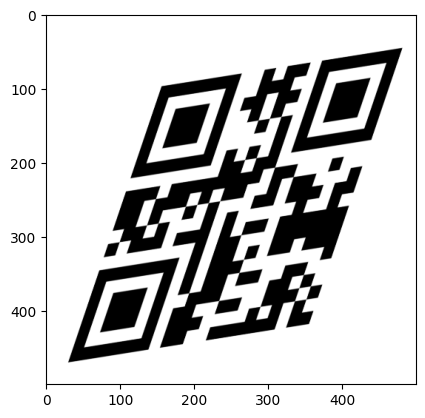

In [ ]:
img = cv2.imread("6.png") #exchang this number with the image number you want to test
img =cv2.resize(img,dsize=(500,500))
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap="gray")
plt.show()

#Image analysis

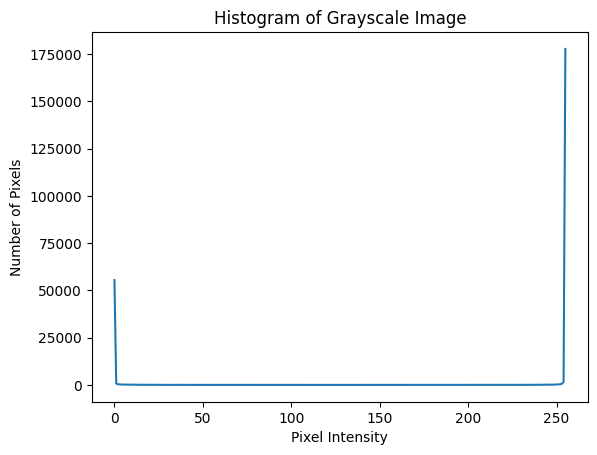

In [ ]:
hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Grayscale Image")
plt.show()

In [ ]:
# for i in range(1,17):
#   img = cv2.imread(f"{str(i)}.png")
#   img =cv2.resize(img,dsize=(500,500))
#   gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#   plt.imshow(gray1, cmap="gray")
#   plt.show()

#   hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])
#   plt.figure()
#   plt.plot(hist)
#   plt.xlabel("Pixel Intensity")
#   plt.ylabel("Number of Pixels")
#   plt.title("Histogram of Grayscale Image")
#   plt.show()

#   unique_values, counts = find_unique_pixel_values(gray1)
#   print(unique_values)
#   print(f"no. unique in image {i}: {len(unique_values)}")
#   print(counts)


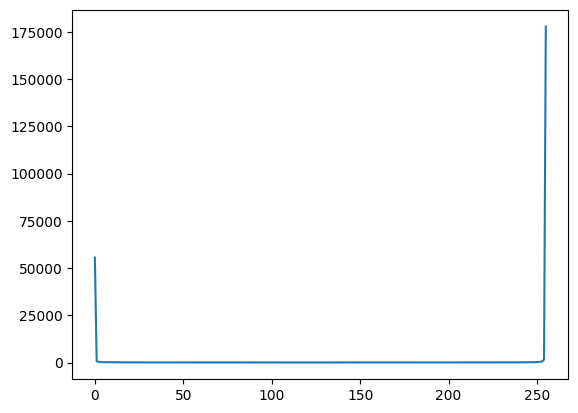

In [ ]:
min_val, max_val, _, _ = cv2.minMaxLoc(gray1)
gray = cv2.convertScaleAbs(gray1, alpha=255 / (max_val - min_val), beta=-min_val * 255 / (max_val - min_val))
hist2 = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist2)
plt.show()



#Frame Detection

First we make image segmentation using Canny algorithm


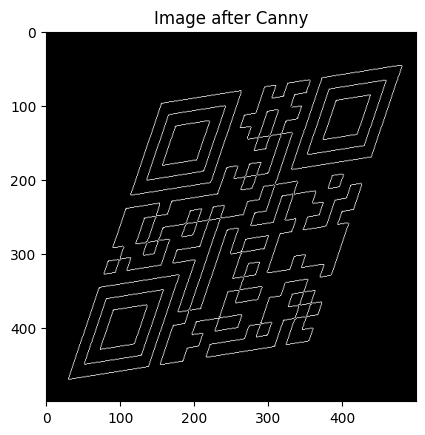

In [ ]:
edges = cv2.Canny(gray, 200, 200)
plt.imshow(edges,cmap="gray")
plt.title('Image after Canny')
plt.show()

Then We draw hough lines

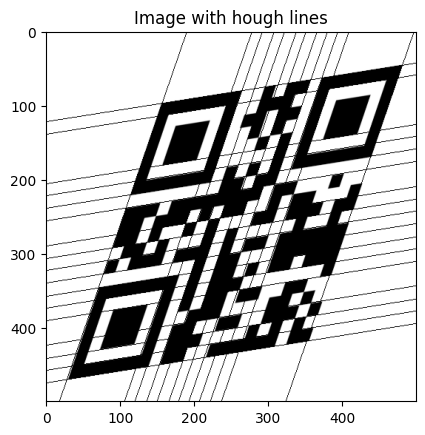

In [ ]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
img2=copy.copy(img)
draw_lines(img2,lines)

Then we get the points of intersection between the Hough Lines to be able To get the contour of the shape later on

The problem with hough lines is that it extends to the whole image frame and if we drawn a contour using only hough lines it will take a larger area than the needed so we must find the points of intersection to get rid of that problem


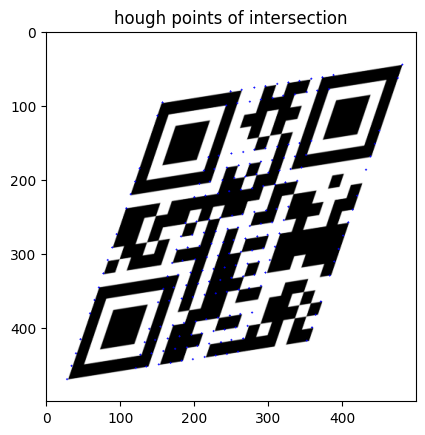

In [ ]:
img3 = copy.copy(img)
intersections = visualize_intersections(img3,lines)

In [ ]:
print(intersections)

[[152, 450], [28, 470], [168, 448], [352, 418], [244, 436], [183, 445], [259, 433], [214, 440], [121, 455], [198, 443], [135, 453], [229, 438], [281, 76], [157, 96], [296, 74], [481, 45], [373, 62], [312, 71], [388, 59], [342, 67], [249, 81], [327, 69], [264, 79], [358, 64], [232, 219], [108, 239], [247, 216], [432, 187], [323, 204], [263, 214], [339, 202], [293, 209], [200, 224], [278, 212], [215, 222], [309, 207], [238, 201], [114, 220], [254, 198], [438, 169], [330, 186], [269, 196], [345, 184], [300, 191], [207, 206], [284, 193], [221, 203], [315, 188], [244, 184], [120, 203], [260, 181], [444, 152], [336, 169], [275, 179], [351, 167], [305, 174], [213, 188], [290, 176], [227, 186], [321, 171], [275, 95], [150, 114], [290, 92], [475, 63], [366, 80], [306, 90], [382, 78], [336, 85], [243, 100], [320, 87], [258, 97], [352, 82], [213, 272], [89, 292], [229, 270], [414, 241], [305, 258], [245, 267], [321, 255], [275, 263], [182, 277], [259, 265], [197, 275], [290, 260], [183, 361], [16

In [ ]:
img4 =copy.copy(img)

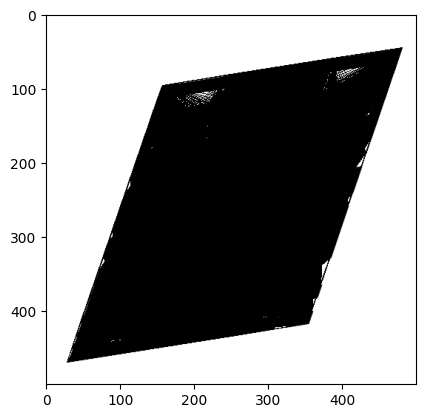

In [ ]:
framed_image = connect_all_points(img4,intersections)

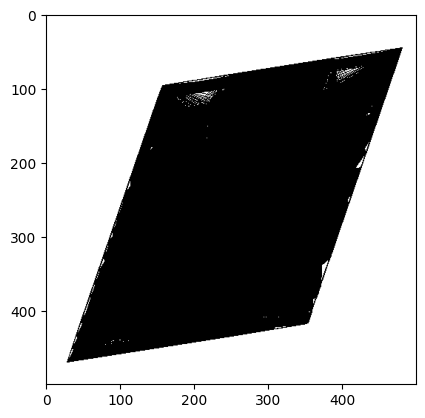

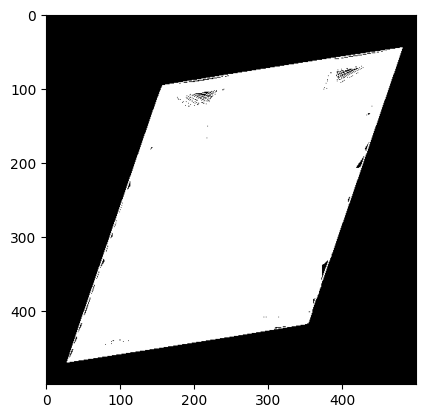

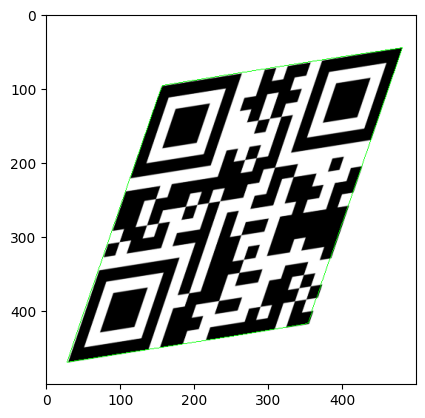

In [ ]:
gray_img = cv2.cvtColor(framed_image, cv2.COLOR_BGR2GRAY)
# inv = 255 -gray_img
limit = np.min(gray_img)

# Invert the thresholding using bitwise NOT operation
ret, thresh = cv2.threshold(gray_img,limit,255,cv2.THRESH_BINARY)

inv = 255 - thresh

plt.imshow(thresh,cmap="gray")
plt.show()

plt.imshow(inv,cmap="gray")
plt.show()

img_copy = copy.copy(img)
contours, hierarchy = cv2.findContours(inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 1)  # Green color

plt.imshow(cont,cmap="gray")
plt.show()

# print(contours)


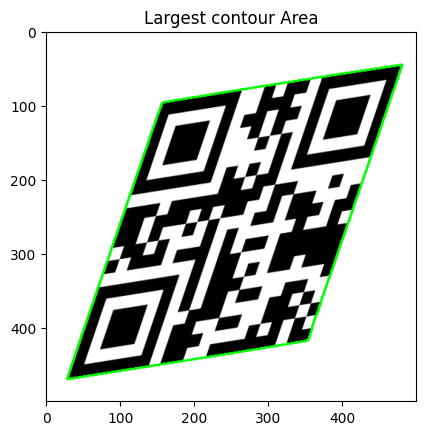

In [ ]:
largest_cont = show_largest_contour(img, contours)

In [ ]:
# Approximate the contour with a polygon (adjust epsilon as needed)
epsilon = 0.01 * cv2.arcLength(largest_cont, True)
approx = cv2.approxPolyDP(largest_cont, epsilon, True)

# Ensure we have a quadrilateral (4 corners)
if len(approx) != 4:
  print("Error: Not a quadrilateral")
  # Handle the case where the contour is not a quadrilateral (optional)
  exit()

# Convert the approximated polygon to NumPy array for easier manipulation
approx = np.array(approx, dtype=np.float32)

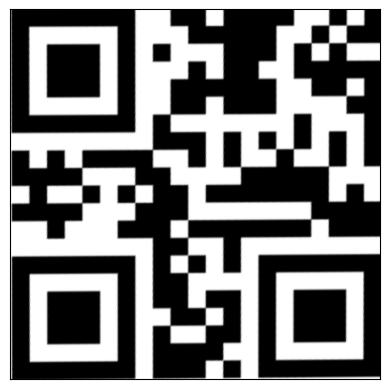

In [ ]:
img_copy = copy.copy(img)
desired_quad = np.float32([[0, 0], [img.shape[1] - 1, 0], [img.shape[1] - 1, img.shape[0] - 1], [0, img.shape[0] - 1]])
# Calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(approx, desired_quad)
warped_image = cv2.warpPerspective(img_copy, M, (img.shape[1], img.shape[0]))  # Adjust output size if needed

# for some reason the warped image brought mirrored and rotated

mirrored_image = cv2.flip(warped_image, 0) # mirror horizontally
rotated = rotate_image(mirrored_image,270)

plt.xticks([], [])
plt.yticks([], [])

rotated[:,0:1]=255
cv2.imwrite("warped.png", rotated)
plt.imshow(rotated,cmap="gray")

plt.show()

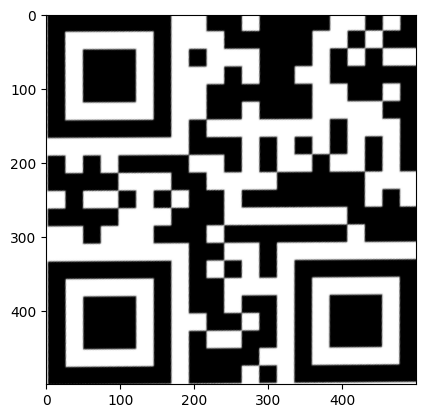

In [ ]:

plt.imshow(rotated,cmap="gray")
plt.show()

#Image Decoding

###Some check on the code Frame detection Validity
no need to look at it !

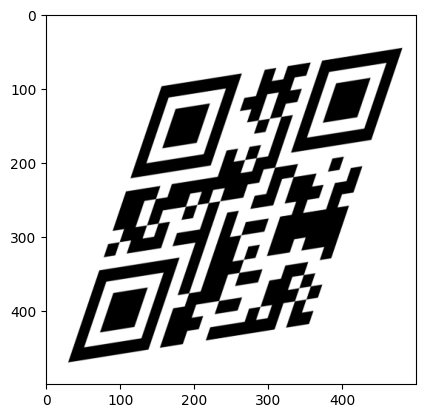

In [ ]:
plt.imshow(img,cmap="gray")
plt.show()

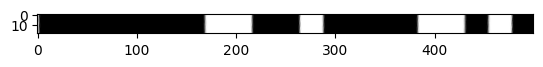

In [ ]:

plt.imshow(rotated[1:20,:],cmap="gray")
plt.show()

In [ ]:
Darkest = np.min(gray)
_, thresh = cv2.threshold(rotated,45,255,cv2.THRESH_BINARY)

In [ ]:
for ele in thresh[1:2,:]:
  for l in ele:
    print(l)

[255 255 255]
[255 255 255]
[255 255 255]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0

In [ ]:
count_balck = 0
for ele in thresh[1:2,:]:

  for l in ele:
    if 0 not in l:
      print(count_balck)
      count_balck=0
      continue
    if 0 in l:
      count_balck+=1
print(count_balck)


0
0
0
165
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
46
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
93
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
20


In [ ]:
# Thresholding with darkest pixel
# Darkest = np.min(gray)
# ret, thresh = cv2.threshold(gray,Darkest,255,cv2.THRESH_BINARY)
# plt.imshow(thresh,cmap="gray")
# plt.show()

#Author : Mohamed Hesham Zidan©